## test plots for IRI2016 in python

- for installation of iri2016 - update cmake with pip, check if ctest is there, but instructions quite unclear 

- added environment.yml file but need to test again

In [7]:
import iri2016 as iri

from pathlib import Path
from argparse import ArgumentParser
from datetime import timedelta
import datetime


import matplotlib.pyplot as plt

from matplotlib.pyplot import show
import iri2016.plots as piri


%matplotlib inline

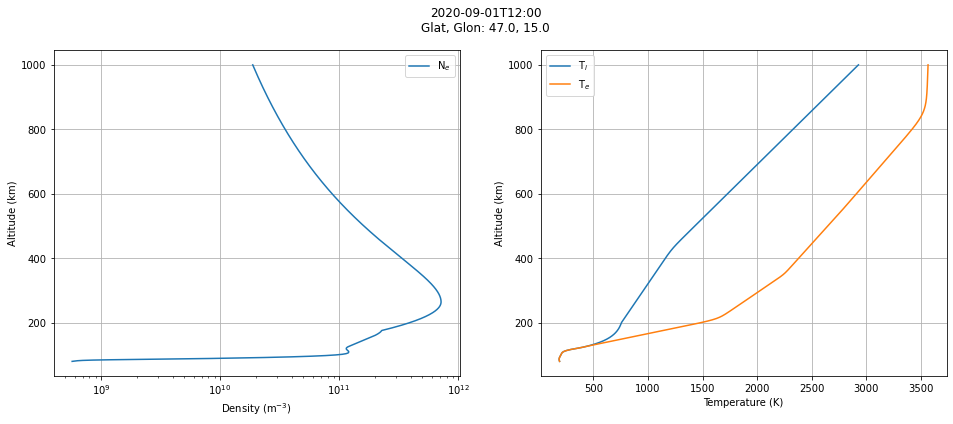

In [10]:
#altitude

itime=datetime.datetime(2020,9,1,12,00) 
ilat=47.0 
ilon=15.0


#p = ArgumentParser(description="IRI2016 altitude profile")
#p.add_argument("time", help="time of simulation")
#p.add_argument("latlon", help="geodetic latitude, longitude (degrees)", type=float, nargs=2)
#p.add_argument("-alt_km", help="altitude START STOP STEP (km)", type=float, nargs=3, default=(80, 1000, 10))
#P = p.parse_args()

#iono = iri.IRI(P.time, P.alt_km, *P.latlon)

alt_km=[80,1000,1]
iono = iri.IRI(itime, alt_km,ilat,ilon)


piri.altprofile(iono)

plt.savefig('results/altitude_test.png',dpi=100)
#piri.latprofile(iono)
#piri.timeprofile(sim)


In [ ]:
def latitude():
    """ latitude Profile Example """

    if show is None:
        raise ImportError("need matplotlib")

    p = ArgumentParser(description="IRI2016 latitude profile")
    p.add_argument("glon", help="geodetic  longitude (degrees)", type=float)
    p.add_argument("-glat", help="geodetic latitude START STOP STEP (degrees)", type=float, nargs=3, default=(-60, 60, 2.0))
    p.add_argument("-alt_km", help="altitude (km)", type=float, default=300.0)
    p.add_argument("-o", "--outfn", help="write data to file")
    P = p.parse_args()

    iono = iri.geoprofile(latrange=P.glat, glon=P.glon, altkm=P.alt_km, time="2004-01-01T17")

    if P.outfn:
        outfn = Path(P.outfn).expanduser()
        print("writing", outfn)
        iono.to_netcdf(outfn)

    piri.latprofile(iono)
    show()


def time_profile():
    """ IRI2016 time profile """

    if show is None:
        raise ImportError("need matplotlib")

    p = ArgumentParser()
    p.add_argument("time", help="start yy-mm-dd, stop yy-mm-dd, step_hour", nargs=3)
    p.add_argument("latlon", help="geodetic latitude, longitude (degrees)", nargs=2, type=float)
    p.add_argument("-alt_km", help="altitude START STOP STEP (km)", type=float, nargs=3, default=(100, 200, 20))
    P = p.parse_args()

    sim = iri.timeprofile((P.time[0], P.time[1]), timedelta(hours=float(P.time[2])), P.alt_km, *P.latlon)

    piri.timeprofile(sim)
    show()